<a href="https://colab.research.google.com/github/luis314159/portfolio/blob/master/Dynamic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<center>Universidad Autónoma de Chihuahua**

<div align= "center">
<img src="https://uach.mx/assets/media/snippet/62/escudo-web-header-black.svg" width="350" height="350" />

</div>
<div align ="center">
<img src="https://cimav.edu.mx/wp-content/uploads/2017/05/ingenieria-uach.png" width="200" height="200" />
</div>

##<center>Maestría en ingeniería en computación 
##<center>Análisis y diseño de algoritmos  
##<center>Dynamic programming 
##<center>Weighted Interval Scheduling and Knapsack
###<center>Catedrático: Dr. Jésus Roberto López Santillán
###<center>Estudiante: Ing. Luis Ángel Almazán López</center>
<!-- badges: start -->
[![@luis3.14159](https://img.shields.io/badge/@luis314159-gitHub-darkred?&logoColor=white)](https://github.com/luis314159/) 
[![Platzi](https://img.shields.io/badge/Platzi_count-luisangelalmaznlpez-green&logoColor=white)](https://platzi.com/p/luisangelalmaznlpez/)
![Email](https://img.shields.io/badge/email-p364977@uach.mx-darkblue?&logoColor=white)
<!-- badges: end -->

#Weighted Interval Scheduling

##Planteamiento del problema 
El problema es lograr candelarizar los eventos o intervalos ponderados que no se intersecten con otros y que sumen el mayor valor posible, todo esto en tiempo polinomial 


##Explicación 
Para lograr encontrar la solución en tiempo polinomial se evaluara si la suma de valores para el intervalo actual $j$ es mayor al tomar este vento junto a los compatibles o tomar el valor optimo anterior ($j-1$).

Se usara una estructura de memorización $P$ para dar el evento compatible anterior, entonces tendremos:

$OPT(j)=\left\lbrace\begin{array}{c}0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~if~j=0 \\ max\{v_j~+~OPT(p(j)),~OPT(j-1)\}~~~~~otherwise \end{array}\right.$


para no calcular esto de manera recursiva se utiliza una estructura de memorización $M$ donde se guardara el valor optimo para cada posción dada, quedando de la siguiente menera:


$OPT(j)=\left\lbrace\begin{array}{c}0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~if~j=0 \\ max\{v_j~+~M(p(j)),~M(j-1)\}~~~~~~~~~~~~otherwise \end{array}\right.$

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


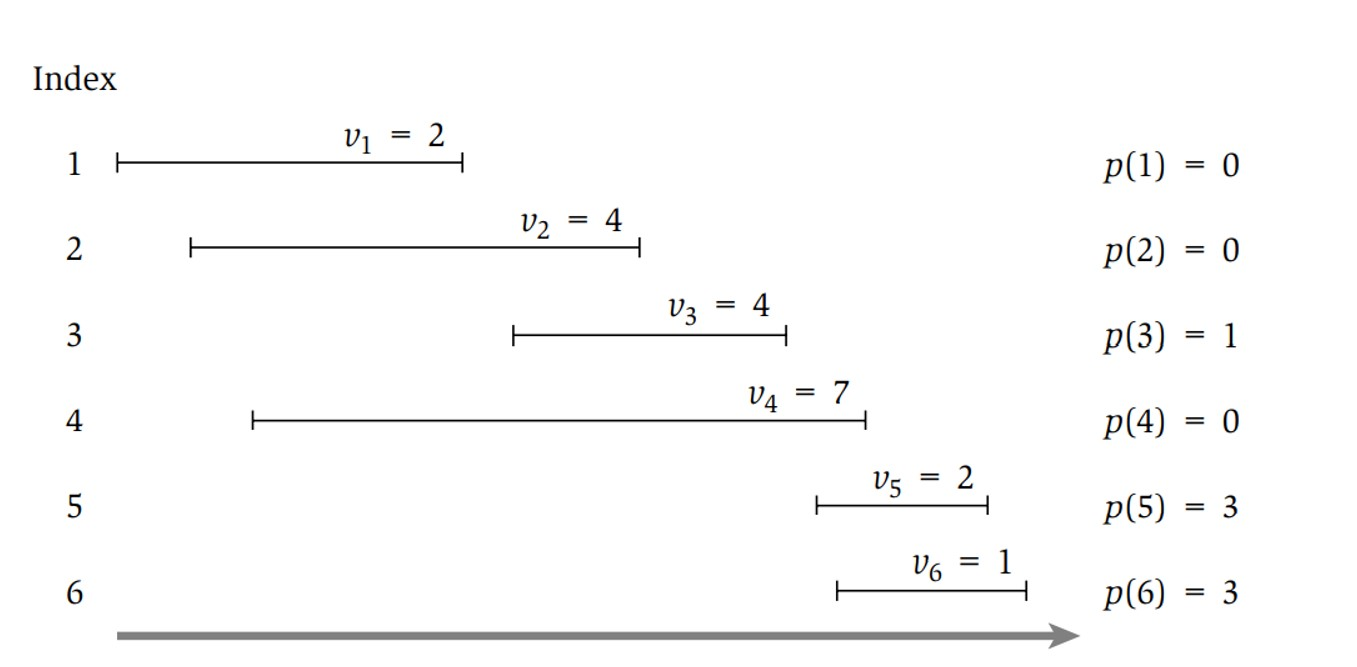

In [ ]:
#@title Schedule
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image 
Image("/content/drive/MyDrive/Analisis/images/dynamic/schedule4.jpg")



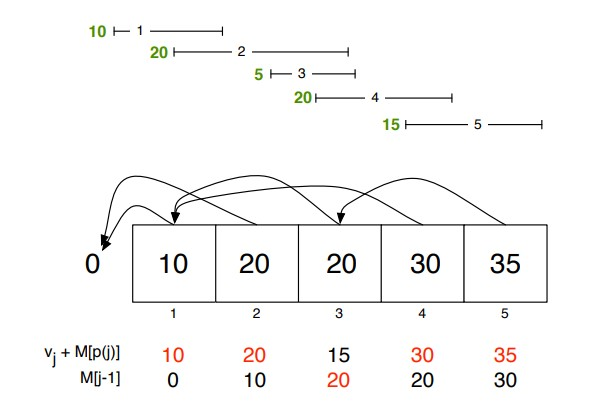

In [ ]:
#@title 
from IPython.display import Image 
Image("/content/drive/MyDrive/Analisis/images/dynamic/schedule3.jpg")

##Code

In [ ]:
class Schedule():
  def __init__(self,values):
    self.values=values
    self.v=[0]
    self.p=[0]
    self.M=[0]
    ends=[0]
    start=[0]
    self.selected=[False]
    self.aim=len(self.values)
    self.solution=[]

    #Aquí se crea el atributo v para guardar los pesos dados
    for i in self.values.values():
      self.v.append(i[2])
      start.append(i[0])
      ends.append(i[1])
      #Aquí se automatizó la creación del atributo p, para saber el intervalo anterior que no se solapa con el intervalo actual
      for j in range(len(ends)-1, -1, -1):
        if ends[j]<=start[-1]:
          self.p.append(j)
          break
    


  def OPT(self):
    #Aquí se obtiene la solución optima con la matriz de memorización (atributo M)
    for j in range(1,len(self.v)):
      if (self.v[j] + self.M[self.p[j]])>self.M[j-1]:
        self.M.append(self.v[j] + self.M[self.p[j]])
        self.selected.append(True)
      else:
        self.M.append(self.M[j-1])
        self.selected.append(False)


  def BacktrackForSolution(self):
    #aquí se obtiene se muestra cuales intervalos del horario dan la solución optima 
    if self.aim>=0:
      if self.selected[self.aim]:
        print(self.aim,end =" ")    
        self.aim=self.p[self.aim]  
        self.BacktrackForSolution()
      else:
        self.aim-=1
        self.BacktrackForSolution()


def run():
  #Index value:[start, finish, weigth]
  sc1={1:[0,3,10],2:[2,5,20],3:[3,5,5],4:[4,7,20],5:[6,10,15]}
  sc2={1:[0,4,2],2:[1,7,4],3:[5,9,4],4:[2,10,7],5:[9,12,2],6:[9,13,1]}

  print("===================================")
  print("   Weighted Interval Scheduling")

  SC1=Schedule(sc1)
  SC1.OPT()
  SC2=Schedule(sc2)
  SC2.OPT()
  print("===================================")
  print(f"optimal solution for schedule1 = {SC1.M[-1]}: ")
  SC1.BacktrackForSolution()
  print()
  print("===================================")
  print(f"optimal solution for schedule2 = {SC2.M[-1]}: ")
  SC2.BacktrackForSolution()

if __name__=="__main__":
  run()

   Weighted Interval Scheduling
optimal solution for schedule1 = 35: 
5 2 
optimal solution for schedule2 = 8: 
5 3 1 

#Knapsack

##Planetamiento del problema:
Se tiene $n$ objetos y una "mochila" que tiene una capacidad $W$ de peso, cadad objeto $i$ tiene un peso $w_i$ y un valor $v_i$, interesa saber con cuales objetos podemos echar a la mochila y tener el valor máximo, de tal manera que no se sobre pase el la capacidad de la mochila 



##Ejemplo:


| $i$  |  $v_i$ | $w_i$ |
|:---|:---:|:---:|
| 1 | 1  | 1 |
| 2 | 6  | 2 |
| 3 | 18 | 5 |
| 4 | 22 | 5 |
| 5 | 28 | 7 |

<center>
$weigth~limit~W=11$
</center>

##Explicación 
Se puede encontrar la solución optima utilizando programación dinámica,recorriendo cada objeto $i$, notese que habrá dos posibles casos:


*   No se seleciona el elemento
*   Se seleciona el elemento, por lo que la capacidad de la mochila se vera reducidad a: $W-w_i$

De esta manera, se puede plantear la función $OPT(i,W)$, que dara la solución optima, en donde $i$ sera el elemento y $W$ el peso de la mochila




$OPT(i,W)=\left\lbrace\begin{array}{c}0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~if~j=0 \\ OPT(i-1,W)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~if~w_i>W\\max\{OPT(i-1),V_i+~OPT(i-1,W-w_i)\}~~~~~~~~otherwise \end{array}
\right.$


Se puede utlizar una estructura de memorización, para guardar los valores optimos para cada peso $w<W$


##Pseudocódigo


```
KNAPSACK (n, W, w1, …, wn, v1, …, vn ) 

  FOR w = 0 TO W
    M [0, w] ← 0. 

  FOR i = 1 TO n 
    FOR w = 0 TO W
      IF (wi > w) 
        M [ i, w] ← M [ i – 1, w]. 
      ELSE 
        M [ i, w] ← max { M [ i – 1, w], vi + M [ i – 1, w – wi] }. 
RETURN M[n, W]. 
```



##code

In [ ]:
class Items():
  def __init__(self,values):
    self.v=[0]+values[0]
    self.w=[0]+values[1]


def knapsack(items,W):
  L=len(items.v)
  M= matriz = [[0] *(W+1) for i in range(L)]

  for i in range(1,L):
    for w in range (W+1):
      if items.w[i]>w:
        M[i][w]=M[i-1][w]
      else:
        M[i][w]=max(M[i-1][w], items.v[i]+M[i-1][w-items.w[i]])

  def BacktrackForSolution(v,i,j,sol):
    if i==0:
      print(f"Elementos para la solución optima:{sol}")
      return sol
    if M[i][j]==M[i-1][j]:
      i-=1
      BacktrackForSolution(v,i,j,sol)

    else:
      v-=items.v[i]
      sol.append(i)
      j-=items.w[i]
      BacktrackForSolution(v,i-1,j,sol)

  BacktrackForSolution(M[-1][-1],L-1,W,[])
  print("Valor máximo almacenado en la mochila : ",end="")
  return (M[-1][-1])


def run():
  print("===============================================")
  print("                 knapsack")
  print("===============================================")

  #items=values, weigth
  values=[[1,6,18,22,28],[1,2,5,6,7]]

  Items1=Items(values)
  W=11
  #print(Items1.v)
  print(knapsack(Items1,W))



if __name__=="__main__":
  run()



                 knapsack
Elementos para la solución optima:[4, 3]
Valor máximo almacenado en la mochila : 40


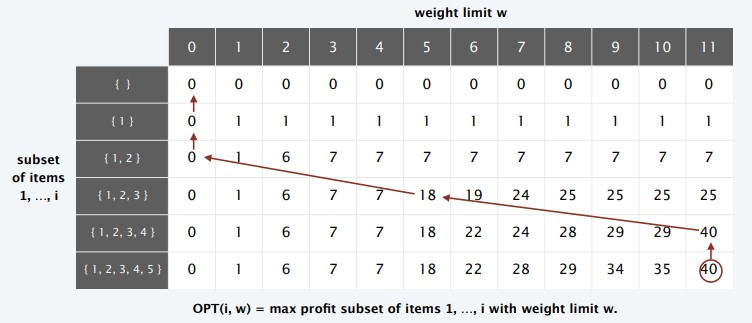

In [ ]:
#@title  
from IPython.display import Image 
Image("/content/drive/MyDrive/Analisis/images/dynamic/schedule6.jpg")

#Conclusiones 
El algoritmo de Ford Fulkerson nos permite obtene el valor del flujo máximo de un grafo para una fuente y un simidero.
